In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np

%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt

import gmaps

# Google developer API key
from config import gkey

gmaps.configure(api_key=gkey)

# File to Load (Remember to Change These)
file_to_load = "Resources/flightdata5y.csv"

# Read Purchasing File and store into Pandas data frame
flight = pd.read_csv(file_to_load)
flight_df = pd.DataFrame(flight)


In [2]:
yeargroups= flight_df.groupby('Year')


In [3]:
yeargroups_df = yeargroups[['DEPDELAY','ARRDELAY','DISTANCE','CANCELLED']]

In [4]:
yeargroups_df.sum()

,DEPDELAY,ARRDELAY,DISTANCE
Year,,,
2012,332825.0,85921.0,39905165
2013,387473.0,170493.0,40339588
2014,525621.0,364095.0,39624744
2015,403152.0,162322.0,41779277
2016,240800.0,49471.0,28391612


In [5]:
new_data = flight_df[['MONTH','Year','AIRLINECODE','ARRDELAY','CANCELLED','DISTANCE','ORIGINSTATE','ORIGINCITYNAME']]
new_df = pd.DataFrame(new_data)
new_df.head()

,MONTH,Year,AIRLINECODE,ARRDELAY,CANCELLED,DISTANCE,ORIGINSTATE,ORIGINCITYNAME
0,1,2016,DL,-16.0,F,748,MT,Billings
1,1,2016,DL,-21.0,F,748,MT,Billings
2,1,2016,OO,-21.0,F,387,MT,Billings
3,1,2016,OO,-14.0,F,387,MT,Billings
4,1,2016,DL,-1.0,F,387,MT,Billings


In [6]:
years= new_df['Year'].unique()
years

array([2016, 2015, 2014, 2013, 2012], dtype=int64)

In [7]:
year_canceled = new_df.groupby('Year')['CANCELLED'].value_counts()
year_canceled

Year  CANCELLED
2012  F            50982
      T              542
2013  F            52074
      T              592
2014  F            48096
      T             1612
2015  F            49870
      T              713
2016  F            32706
      T              501
Name: CANCELLED, dtype: int64

In [8]:
distance_sum = new_df.groupby('Year')['DISTANCE'].sum()
distance_sum

Year
2012    39905165
2013    40339588
2014    39624744
2015    41779277
2016    28391612
Name: DISTANCE, dtype: int64

In [9]:
airlines =new_df['AIRLINECODE'].value_counts()
airlines

WN    49609
DL    33577
EV    25656
OO    24937
AA    22286
UA    20111
US    12153
MQ    12089
B6    10562
AS     6833
FL     4276
HA     3425
F9     3084
VX     2583
9E     2530
YV     2095
NK     1882
Name: AIRLINECODE, dtype: int64

In [10]:
year2012 = flight_df.loc[flight_df['Year'] == 2012]
year2013 = flight_df.loc[flight_df['Year'] == 2013]
year2014 = flight_df.loc[flight_df['Year'] == 2014]
year2015 = flight_df.loc[flight_df['Year'] == 2015]
year2016 = flight_df.loc[flight_df['Year'] == 2016]


In [11]:
distance2012 = year2012.groupby('AIRLINECODE')['DISTANCE'].sum()
distance2013 = year2013.groupby('AIRLINECODE')['DISTANCE'].sum()
distance2014 = year2014.groupby('AIRLINECODE')['DISTANCE'].sum()
distance2015 = year2015.groupby('AIRLINECODE')['DISTANCE'].sum()
distance2016 = year2016.groupby('AIRLINECODE')['DISTANCE'].sum()

In [12]:
airlines2012 = year2012['AIRLINECODE'].value_counts()
airlines2013 = year2013['AIRLINECODE'].value_counts()
airlines2013 = year2013['AIRLINECODE'].value_counts()
airlines2013 = year2013['AIRLINECODE'].value_counts()
airlines2013 = year2013['AIRLINECODE'].value_counts()

In [13]:
year2012_df = pd.DataFrame(year2012)['Year'].count()
year2013_df = pd.DataFrame(year2013)['Year'].count()
year2014_df = pd.DataFrame(year2014)['Year'].count()
year2015_df = pd.DataFrame(year2015)['Year'].count()
year2016_df = pd.DataFrame(year2016)['Year'].count()

In [14]:
TotalFlightYear = [year2012_df,year2013_df,year2014_df,year2015_df,year2016_df]
TotalFlightYear_df = pd.DataFrame(TotalFlightYear)
TotalFlightYear_df.columns =['TotalFlightbyYear']
TotalFlightYear_df


,TotalFlightbyYear
0,51524
1,52666
2,49708
3,50583
4,33207


In [15]:
TotalFlightYear_df ['year']= years
TotalFlightYear_df

,TotalFlightbyYear,year
0,51524,2016
1,52666,2015
2,49708,2014
3,50583,2013
4,33207,2012


In [16]:
df = TotalFlightYear_df.set_index("year")
df

,TotalFlightbyYear
year,
2016,51524
2015,52666
2014,49708
2013,50583
2012,33207


# citybargraph

In [17]:
city = flight_df.groupby('ORIGINCITYNAME')
city_count = city.count()['Year']
city_df = pd.DataFrame(city_count)
city_df.columns = ['Total']
busiestcity = city_df.sort_values(by=['Total'],ascending=False )
top5city = busiestcity.iloc[0:5, :]
top5city

,Total
ORIGINCITYNAME,
Atlanta,15848
Houston,10388
Los Angeles,10135
New York,9452
Chicago,8842


In [18]:
top5city['Total']


ORIGINCITYNAME
Atlanta        15848
Houston        10388
Los Angeles    10135
New York        9452
Chicago         8842
Name: Total, dtype: int64

In [19]:
x_axis = np.arange(len(top5city))
x_axis

array([0, 1, 2, 3, 4])

<BarContainer object of 5 artists>

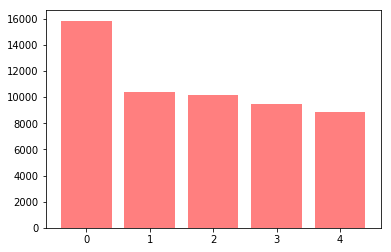

In [20]:
plt.bar(x_axis, top5city['Total'], color='r', alpha=0.5, align="center")

# citygmaps

In [21]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()

C:\Users\Cresent7\Anaconda3\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [22]:
citystate = flight_df[['ORIGINCITYNAME','ORIGINSTATE']]

merge_table = pd.merge(top5city, citystate , on="ORIGINCITYNAME", how='inner')
a= merge_table.drop_duplicates('ORIGINSTATE', keep = 'first')
df = pd.DataFrame(a).set_index("ORIGINCITYNAME")
df

,Total,ORIGINSTATE
ORIGINCITYNAME,,
Atlanta,15848,GA
Houston,10388,TX
Los Angeles,10135,CA
New York,9452,NY
Chicago,8842,IL


In [26]:
List = []

count = 0
for count in range(len(top5city)):
    target_city = df.index[count]+','+ df.iloc[count, 1]
    loc = geolocator.geocode(target_city+",US")
    a = loc.latitude, loc.longitude
    
    List.append(a)
    count = count + 1

In [27]:
gmaps.configure(api_key=gkey)

In [28]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer( List ,top5city['Total'],  dissipating=False, max_intensity=10,point_radius=1)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))